In [1]:
import pandas as pd
data=pd.read_excel("FinalData.xlsx")
data.shape

(2769, 57)

In [2]:
data=data.drop([352,2566], axis=0)

In [3]:
data_ml=data.copy()
data_ml=data_ml.drop(["fips1",'Country','Democrat','Republican'], axis=1)
onehot_df = pd.get_dummies(data_ml, prefix="State",columns=["State"],
                          drop_first=False)
onehot_df.shape

(2767, 97)

In [4]:
pd.pandas.set_option('display.max_columns',None)

In [5]:
y=onehot_df["winner"]
X=onehot_df.drop(["winner"],axis=1)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X_scaled)
X_pca.shape

(2767, 57)

In [8]:
pca.explained_variance_ratio_

array([0.1761892 , 0.06279427, 0.05302443, 0.0404226 , 0.03478786,
       0.02739622, 0.02510332, 0.02141004, 0.01645311, 0.01569006,
       0.01481014, 0.01352063, 0.01260133, 0.01224216, 0.01176139,
       0.01164507, 0.01141059, 0.0111132 , 0.01101081, 0.01097408,
       0.01093089, 0.01089922, 0.01086394, 0.01085974, 0.01085022,
       0.01081662, 0.01078857, 0.0107801 , 0.01076281, 0.01074931,
       0.0107133 , 0.01069987, 0.01068871, 0.01066087, 0.01064878,
       0.01063871, 0.01061169, 0.01058692, 0.01055975, 0.01050487,
       0.01050416, 0.01048345, 0.01045939, 0.01044298, 0.01039854,
       0.01034042, 0.00971291, 0.0091441 , 0.00908106, 0.00870573,
       0.00770892, 0.00732171, 0.00639862, 0.00590462, 0.00556059,
       0.00507335, 0.00500119])

In [10]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(X_train_pca,y_train)
y_pred=logit_model.predict(X_test_pca)

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8447653429602888
Precision is:  0.8743169398907104
Recall is:  0.8888888888888888
f1 score is:  0.8815426997245178


In [13]:
confusion_matrix(y_test,y_pred)

array([[148,  46],
       [ 40, 320]], dtype=int64)

**This is one of the best values of accuracy among all algorithms used in this project so far. Let us try K-NN, SVM and RandomForest with the PCA feature-reduced data**

# KNN

In [14]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train_pca,y_train)
    y_pred = classifier.predict(X_test_pca)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [15]:
acc_values

[0.776173285198556,
 0.7906137184115524,
 0.8014440433212996,
 0.8014440433212996,
 0.8014440433212996,
 0.8032490974729242,
 0.8032490974729242,
 0.8014440433212996,
 0.8086642599277978,
 0.8050541516245487,
 0.7942238267148014,
 0.796028880866426]

Text(0, 0.5, 'accuracy')

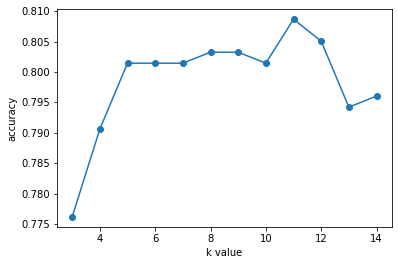

In [16]:
import matplotlib.pyplot as plt
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

**Here we observe the greatest accuracy for k=11**

In [18]:
classifier = KNeighborsClassifier(n_neighbors=11, metric='minkowski')
classifier.fit(X_train_pca,y_train)
y_pred = classifier.predict(X_test_pca)

In [19]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8086642599277978
Precision is:  0.8067632850241546
Recall is:  0.9277777777777778
f1 score is:  0.8630490956072351


In [20]:
confusion_matrix(y_test,y_pred)

array([[114,  80],
       [ 26, 334]], dtype=int64)

**The logistic regression model gave better results, as seen from the metrics**

# SVM

In [25]:
from sklearn.svm import SVC
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train_pca,y_train)

SVC(kernel='linear')

In [26]:
y_pred=svm_linear.predict(X_test_pca)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8465703971119134
Precision is:  0.8647214854111406
Recall is:  0.9055555555555556
f1 score is:  0.8846675712347354


In [27]:
confusion_matrix(y_test,y_pred)

array([[143,  51],
       [ 34, 326]], dtype=int64)

**It can be seen that the linear SVM has produced results very slightly better than the Logistic regression(above); there is one less misclassification**

# Radial SVM

In [28]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train_pca,y_train)
y_pred=svm_radial.predict(X_test_pca)

In [29]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8158844765342961
Precision is:  0.8324742268041238
Recall is:  0.8972222222222223
f1 score is:  0.8636363636363636


In [30]:
confusion_matrix(y_test,y_pred)

array([[129,  65],
       [ 37, 323]], dtype=int64)

**Radial SVM is inferior to Linear SVM in this particular scenario**

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_pca,y_train)
y_pred=rf.predict(X_test_pca)

In [32]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8321299638989169
Precision is:  0.8579088471849866
Recall is:  0.8888888888888888
f1 score is:  0.8731241473396998


In [33]:
confusion_matrix(y_test,y_pred)

array([[141,  53],
       [ 40, 320]], dtype=int64)

**Random Forest has performed far better with PCA than without PCA, but still it does not match up to linear SVM**

**Feature Importance**

In [34]:
type(X_pca)

numpy.ndarray

In [35]:
X_pca=pd.DataFrame(X_pca)

In [37]:
pd.Series(rf.feature_importances_,index=X_pca.columns).sort_values(ascending=False)

16    0.052140
3     0.050899
0     0.044659
18    0.032744
19    0.028964
4     0.028566
21    0.027072
1     0.026189
9     0.025440
26    0.025066
2     0.021361
8     0.018022
5     0.017655
20    0.017345
42    0.017290
35    0.017256
6     0.017061
25    0.016884
7     0.016817
13    0.016593
30    0.016455
15    0.016455
55    0.015709
32    0.015685
27    0.015539
43    0.015013
49    0.014776
33    0.014710
24    0.014512
37    0.014422
45    0.014297
28    0.014078
23    0.013852
53    0.013799
31    0.013748
40    0.013651
12    0.013106
41    0.013091
44    0.012964
50    0.012802
11    0.012737
29    0.012705
56    0.012533
10    0.012354
52    0.012172
34    0.011597
38    0.011580
22    0.011530
36    0.011494
17    0.011455
46    0.011099
54    0.010965
48    0.010699
39    0.010340
14    0.010299
47    0.010005
51    0.009746
dtype: float64

**Since the columns here are generated by the PCA transformation, they are not interpretable to us, and we shall retain all of them**